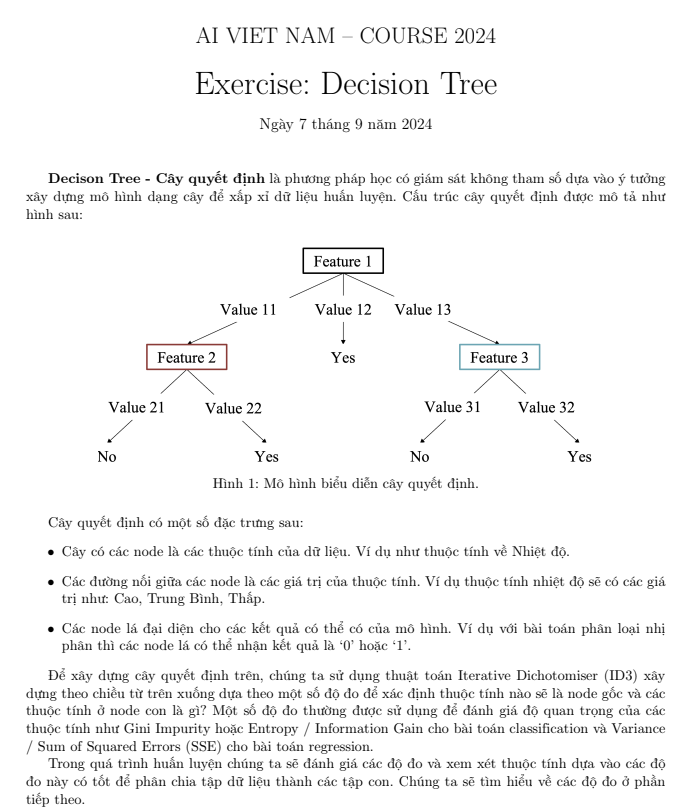
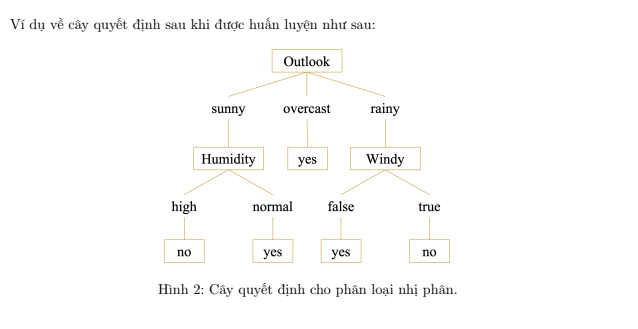
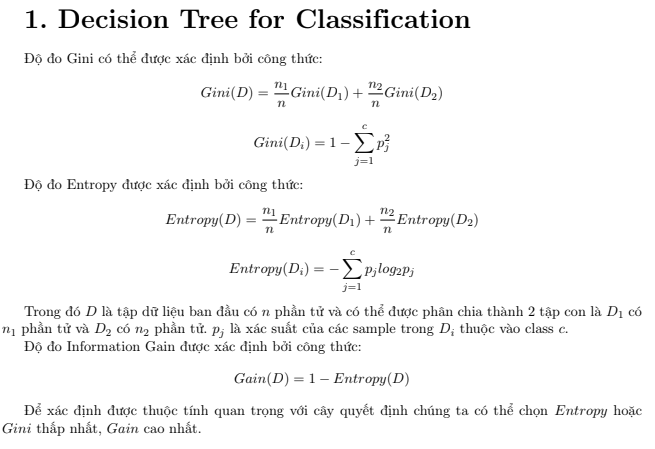

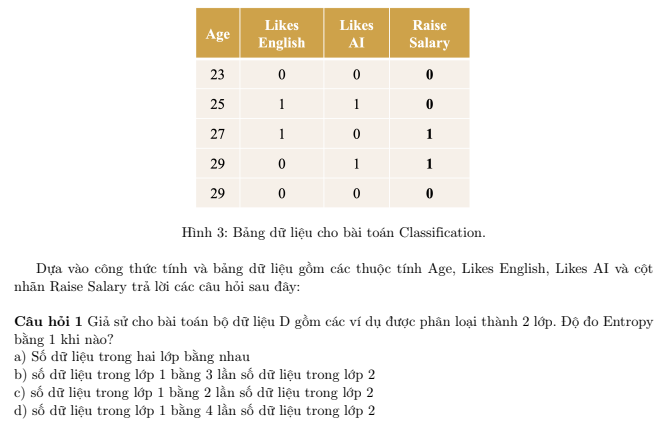

In [ ]:
from collections import Counter

import numpy as np


def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    data = datasets.load_breast_cancer()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = DecisionTree(max_depth=10)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy:", acc)

In [ ]:
1 A, 2 C, 3 D, 4 C, 5 B, 6 A, 7 A, 8 A, 9 A, 10 C, 11 A

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = {'age': [23, 25, 27, 29, 29],
        'likes english': [0, 1, 1, 0, 0],
        'likes ai': [0, 1, 0, 1, 0],
        'raise salary': [0, 0, 1, 1, 0]}
df = pd.DataFrame(data)
X = df[['age', 'likes english', 'likes ai']].values
y = df[['raise salary']].values.reshape(-1,)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [2]:
x_test = np.array([[27, 0, 1]])
predicted_label = clf.predict(x_test)
predicted_label

array([1])

[Text(0.3333333333333333, 0.875, 'age <= 26.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'age <= 28.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'likes ai <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

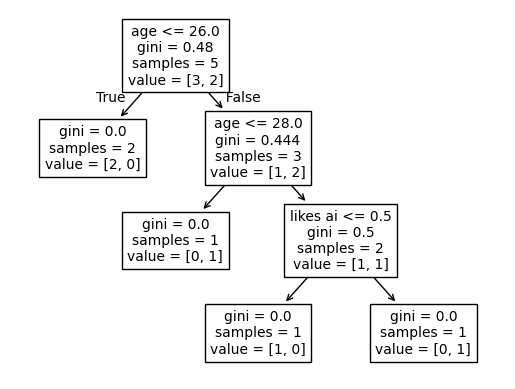

In [3]:
from sklearn.tree import plot_tree
plot_tree(clf, feature_names=['age', 'likes english', 'likes ai'], fontsize=10)

In [4]:
df = pd.DataFrame(data)
X = df[['age', 'likes english', 'likes ai']].values
y = df[['raise salary']].values.reshape(-1,)
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

In [5]:
x_test = np.array([[27, 0, 1]])
predicted_label = clf.predict(x_test)
predicted_label

array([1])

[Text(0.4, 0.875, 'age <= 26.0\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'likes english <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'likes ai <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

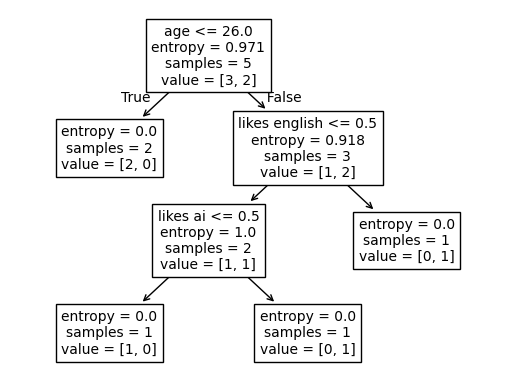

In [6]:
from sklearn.tree import plot_tree
plot_tree(clf, feature_names=['age', 'likes english', 'likes ai'], fontsize=10)

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [8]:
iris_X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [9]:
iris_y[:2]

array([0, 0])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

In [11]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = dt_classifier.predict(X_test)

In [13]:
y_test[:2]

array([1, 0])

In [14]:
y_pred[:2]

array([1, 0])

In [15]:
accuracy_score(y_test, y_pred)

1.0

[Text(0.3076923076923077, 0.9285714285714286, 'Petal_Length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'Petal_Length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'Petal_Width <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'Petal_Width <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'Petal_Length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'g

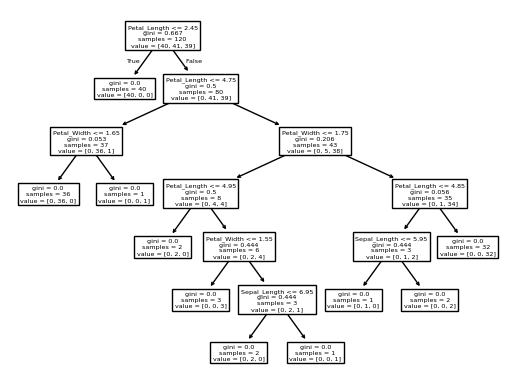

In [16]:
from sklearn.tree import plot_tree
plot_tree(dt_classifier, feature_names=["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"])

### Decision Tree for Regreesion

#### Sum of Squared Error

In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
data = {'age': [23, 25, 27, 29, 29],
        'likes english': [0, 1, 1, 0, 0],
        'likes ai': [0, 1, 0, 1, 0],
        'salary': [200, 400, 300, 500, 400]}
df = pd.DataFrame(data)
X = df[['age', 'likes english', 'likes ai']].values
y = df[['salary']].values.reshape(-1,)
reg = DecisionTreeRegressor()
reg = reg.fit(X, y)

In [18]:
x_test = np.array([[18, 1, 1]])
predicted_salary = clf.predict(x_test)
predicted_salary

array([0])

[Text(0.375, 0.875, 'age <= 24.0\nsquared_error = 10400.0\nsamples = 5\nvalue = 360.0'),
 Text(0.25, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'likes english <= 0.5\nsquared_error = 5000.0\nsamples = 4\nvalue = 400.0'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'likes ai <= 0.5\nsquared_error = 2500.0\nsamples = 2\nvalue = 450.0'),
 Text(0.125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 400.0'),
 Text(0.375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 500.0'),
 Text(0.75, 0.375, 'likes ai <= 0.5\nsquared_error = 2500.0\nsamples = 2\nvalue = 350.0'),
 Text(0.625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 300.0'),
 Text(0.875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 400.0')]

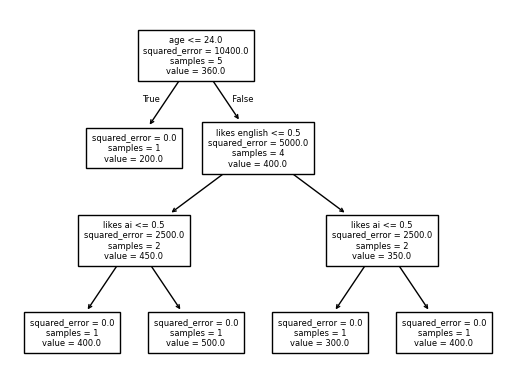

In [19]:
from sklearn.tree import plot_tree
plot_tree(reg, feature_names=['age', 'likes english', 'likes ai'], fontsize=6)

##### CPU Machine Dataset

In [20]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [21]:
from sklearn.datasets import fetch_openml
machine_cpu = fetch_openml(name='machine_cpu')

C:\Users\NolanM\Desktop\AIO_2024\venv\lib\site-packages\sklearn\datasets\_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name machine_cpu exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=230
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=733

  warn(warning_msg)


In [22]:
print(machine_cpu.DESCR)

**Author**:   
**Source**: Unknown -   
**Please cite**:   

The problem concerns Relative CPU Performance Data. More information can be obtained in the UCI Machine
 Learning repository (http://www.ics.uci.edu/~mlearn/MLSummary.html).
 The used attributes are :
 MYCT: machine cycle time in nanoseconds (integer)
 MMIN: minimum main memory in kilobytes (integer)
 MMAX: maximum main memory in kilobytes (integer)
 CACH: cache memory in kilobytes (integer)
 CHMIN: minimum channels in units (integer)
 CHMAX: maximum channels in units (integer)
 PRP: published relative performance (integer) (target variable)
 
 Original source: UCI machine learning repository. 
 Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at
 http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html
 Characteristics: 209 cases; 6 continuous variables

Downloaded from openml.org.


In [23]:
machine_cpu.frame

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


In [24]:
machine_data = machine_cpu.data
machine_labels = machine_cpu.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(machine_data, machine_labels, test_size=0.2,random_state=20)

In [28]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred = tree_reg.predict(X_test)

In [30]:
y_pred[:2]

array([ 56., 397.])

In [31]:
y_test[:2]

134     45
5      318
Name: class, dtype: int64

In [32]:
mean_squared_error(y_test, y_pred)

np.float64(1833.4107142857142)

[Text(0.375, 0.875, 'MYCT <= 24.0\nsquared_error = 10400.0\nsamples = 5\nvalue = 360.0'),
 Text(0.25, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'MMIN <= 0.5\nsquared_error = 5000.0\nsamples = 4\nvalue = 400.0'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'MMAX <= 0.5\nsquared_error = 2500.0\nsamples = 2\nvalue = 450.0'),
 Text(0.125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 400.0'),
 Text(0.375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 500.0'),
 Text(0.75, 0.375, 'MMAX <= 0.5\nsquared_error = 2500.0\nsamples = 2\nvalue = 350.0'),
 Text(0.625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 300.0'),
 Text(0.875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 400.0')]

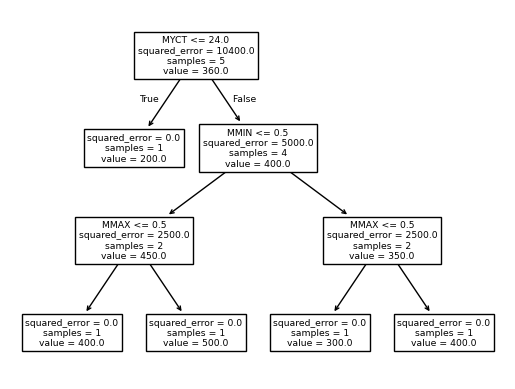

In [33]:
from sklearn.tree import plot_tree
plot_tree(reg, feature_names=['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'])